# Data Desccription:
***Source:*** UCI Machine Learning Repository

***Dataset Name:*** Stock Portfolio Performance Dataset

***Institutions:***
* Department of Information Management, Chung Hua University, Taiwan.
* Department of Civil Engineering, Tamkang University, Taiwan.

***Description of the data:*** The stocks have been selected from the S&P500 stock index which
is based on the market capitalizations of 500 large companies having common stock listed on NYSE
and NASDAQ. TO develop the dataset Yi-Cheng Liu. I-Cheng Yeh makes use of the "Simplex
Centroid Design of Experiments with Mixtures" in which we obtain 2q ^ 1 = 63 combinations of
weights (since q=6). Using a stock market database, "backtesting" through which the performance
of portfolios are obtained.



# Problem to be solved:
The aim of this project is to understand how a weighted stock selection model
can affect portfolio performance parameters such as returns, risk and win rate
that a portfolio manager could expect to achieve when developing weighted stock
selection model. The project also aims to answer the question: What factors have
the most influence on these output parameters? This predictive model could be
used for any dataset that has been developed for another stock index along with
it’s simulated performance parameters to help managers make better decisions
during the stock selection process for their portfolios as per the company’s goals
in terms of portfolio performance parameters and they desire to achieve.

# Technical Details:
### Packages and libraries:
* ***Pandas:*** 
Pandas is a great library for manipulating data and it is widely used for data analysis in python.
* ***Matplotlib & Seaborn:***
Matplotlib is a great library for vizualizing data. Seaborn is basically what makes our vizualizations prettier and cooler and probably easier to understand.
* ***SKLearn:***
Sci-kit Learn is a great machine learning library. You have access to many algorithms with just a couple of lines. It also provides the metrics used for evaluation.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns 

# Context of data:
To understand the data and inferences in this project, one must know what a portfolio is. A
portfolio is a grouping of financial assets such as stocks, bonds, commodities, currencies and cash
equivalents, as well as their fund counterparts, including mutual, exchange-traded and closed funds.
We also cover weighted stock selection, portfolio performance evaluation and portfolio optimization.

***Weighted stock selection***

Stock selection can be an arduous task for any quant firm or investment bank. Selecting from a
large number of stocks just based on intuition alone or based on certain criterion such as expected
returns, risk undertaken, P/E ratios cannot solve the problem of selecting from the large number
of stocks available in the market. The criterion on which stock selection is going to take place
are chosen and each of these criterion are given weights. Based on these criteria a scoring model
is developed and the highest scoring stock is chosen. The weights need to be selected in a way
that the portfolio manager’s goals in terms of risk, return and win rates are achieved. The past
performance of a stock is the only way that quantitative predictions of future stock performance
can be carried out using machine learning algorithms. This is where weighted stock selection can
help.

***Portfolio Performance evaluation***

Investment performance is the return on an investment portfolio. The investment portfolio can
contain a single asset or multiple assets. The investment performance is measured over a specific
period of time and in a specific currency. Investors often distinguish different types of return.
Portfolio evaluating refers to the evaluation of the performance of the investment portfolio. It is
essentially the process of comparing the return earned on a portfolio with the return earned on
one or more other portfolio or on a benchmark portfolio.

***Portfolio Optimization***

Portfolio optimization is the process of choosing the proportions of various assets to be held in
a portfolio, in such a way as to make the portfolio better than any other according to some
criterion. The criterion will combine, directly or indirectly, considerations of the expected value
of the portfolio’s rate of return as well as of the return dispersion and possibly other measures of
financial risk.

# Import and explore the data

In [22]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_excel("/content/drive/My Drive/stock portfolio performance data set.xlsx",header=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We'll first begin by cleaning our data for further use

In [23]:
header_row=1
df.columns = df.iloc[header_row]
df.drop(labels=[0,1],axis=0, inplace=True)
df = df.reset_index(drop=True)
df.head()

1,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
0,1,1,0,0,0,0,0,0.0195163,0.0133985,1.90261,0.218617,0.6,0.4,0.488229,0.609445,0.780756,0.8,0.68,0.333333
1,2,0,1,0,0,0,0,0.0238288,0.00640986,1.26329,0.12874,0.55,0.65,0.505279,0.508169,0.443776,0.41422,0.56,0.666667
2,3,0,0,1,0,0,0,0.0802816,0.0265481,1.89434,0.208272,0.55,0.5,0.728484,0.8,0.776397,0.755594,0.56,0.466667
3,4,0,0,0,1,0,0,-0.00668319,0.000728341,1.42545,0.155526,0.55,0.35,0.38464,0.425836,0.529253,0.529196,0.56,0.266667
4,5,0,0,0,0,1,0,0.0219993,0.00440704,1.09458,0.106729,0.65,0.7,0.498046,0.479146,0.354852,0.319743,0.8,0.733333


We'll leave only the normalized output variables since the models we'll be using ( regression models ) works better with normalized data.

In [24]:
df.columns=['ID', ' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', '1', '2',
       '3', '4', '5', '6',
       'Annual Return', 'Excess Return', 'Systematic Risk', 'Total Risk',
       'Abs. Win Rate', 'Rel. Win Rate']
df.drop(['ID',"1","2","3","4","5","6"],axis=1,inplace=True)
df.columns

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', 'Annual Return', 'Excess Return',
       'Systematic Risk', 'Total Risk', 'Abs. Win Rate', 'Rel. Win Rate'],
      dtype='object')

We will display a correlation matrix to vizualize relationships between variables

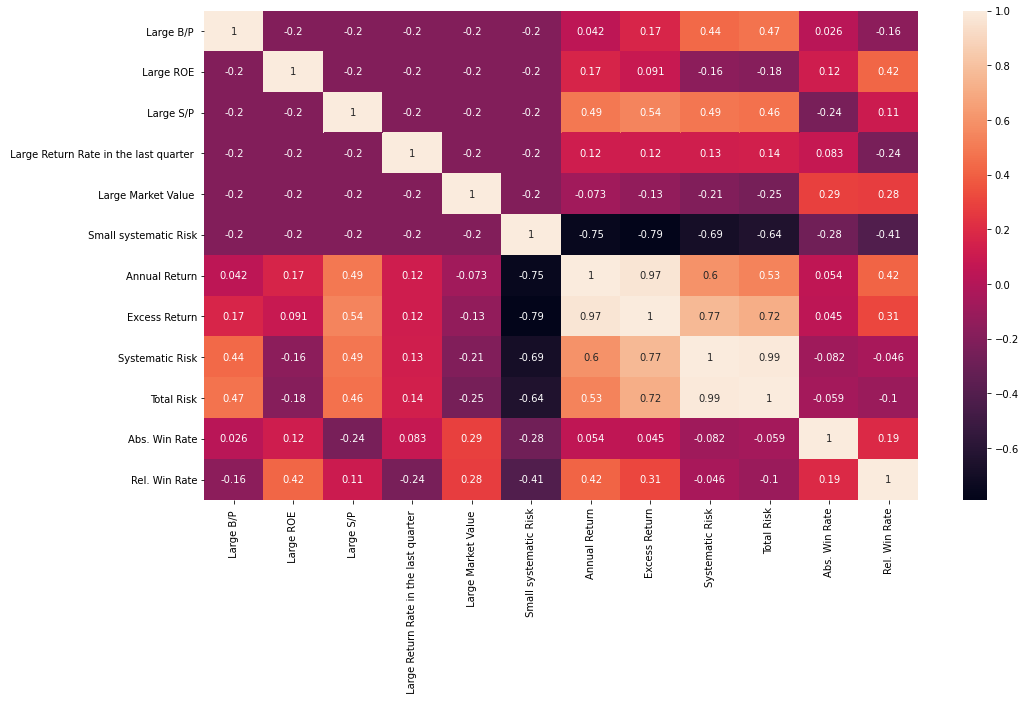

In [25]:
df=df.astype(float)
correlation_matrix=df.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

* We observe that the Annual Returns and Excess Returns are highly correlated.
This makes sense because Annual Return is just the sum of what the market trend returns on
an investment and the Excess return. Similarly, the Systematic risk and Total Risk are show
high positive correlation. We observe that there are strong positive correlations between the Win
Rates and Return Rates observed in the response variables. Moreover, we also observe strong
negative correlations between Risks and Win Rates. This would mean that as managers aim for
higher Win Rates with the investments made, they incur higher levels of Systematic risk and Total
risk. There are no correlations observed amongst the predictors because the values imparted to
these predictors are just weights associated with the factors that have been considered for the
stock selection process. These weights have been uniformly assigned and hence we don’t see any
correlations among these predictors. As for response variables, there are both high positive and
negative correlations amongst these responses. Hence models like linear regression, MARS and
GAM that are used for modeling the data would have a tendency to give poor fits. But tree
based models such as Random Forests, BART and MVTBoost might have superior performances.
* Between the predictors and response variables, a strong positive correlation is observed between
the predictor Relative Win Rate and response Return on Equity. This makes sense, because with
improvements in a company’s performance we can expect higher win rates and this performance
improvement is indicated by a higher return on equity (which is a clear indicator of a company’s
current profits).

# Models:
As this is a regression task, we'll use multiple regression models.
***Simple Linear Regression*** is an evident choice. Then we'll try adding some regularization to our linear model in order to perhaps build a stronger model.
We'll also use ***Decision tree for Regression*** and that is in order to answer our question , which features best explain and predict our dependant variables.

In [28]:
X=df[[' Large B/P ', ' Large ROE ', ' Large S/P ',' Large Return Rate in the last quarter ', ' Large Market Value ',' Small systematic Risk']]
anuual_return=df["Annual Return"]
excess_return=df["Excess Return"]
systematic_risk=df["Systematic Risk"]
total_risk=df["Total Risk"]
awin_rate=df["Abs. Win Rate"]
rwin_rate=df["Rel. Win Rate"]
X_train, X_test, anuual_return_train, anuual_return_test = train_test_split(X, anuual_return,test_size=0.20, random_state = 0)
X_train, X_test, excess_return_train, excess_return_test = train_test_split(X, excess_return,test_size=0.20,random_state = 0)
X_train, X_test, systematic_risk_train, systematic_risk_test = train_test_split(X, systematic_risk,test_size=0.20,random_state = 0)
X_train, X_test, total_risk_train, total_risk_test = train_test_split(X, total_risk,test_size=0.20,random_state = 0)
X_train, X_test, awin_rate_train, awin_rate_test = train_test_split(X, awin_rate,test_size=0.20,random_state = 0)
X_train, X_test, rwin_rate_train, rwin_rate_test = train_test_split(X, rwin_rate,test_size=0.20,random_state = 0)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X_train, anuual_return_train)
lr_pred=lr.predict(X_test)
lr1 = LinearRegression().fit(X_train, excess_return_train)
lr1_pred=lr1.predict(X_test)
lr2 = LinearRegression().fit(X_train, systematic_risk_train)
lr2_pred=lr2.predict(X_test)
lr3 = LinearRegression().fit(X_train, total_risk_train)
lr3_pred=lr3.predict(X_test)
lr4 = LinearRegression().fit(X_train, awin_rate_train)
lr4_pred=lr4.predict(X_test)
lr5 = LinearRegression().fit(X_train, rwin_rate_train)
lr5_pred=lr5.predict(X_test)

print('R-squared score (test): {:.3f}'.format(lr.score(X_test, anuual_return_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(anuual_return_test, lr_pred)))
print('R-squared score (test): {:.3f}'.format(lr1.score(X_test, excess_return_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(excess_return_test, lr1_pred)))
print('R-squared score (test): {:.3f}'.format(lr2.score(X_test, systematic_risk_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(systematic_risk_test, lr2_pred)))
print('R-squared score (test): {:.3f}'.format(lr3.score(X_test, total_risk_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(total_risk_test, lr3_pred)))
print('R-squared score (test): {:.3f}'.format(lr4.score(X_test, awin_rate_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(awin_rate_test, lr4_pred)))
print('R-squared score (test): {:.3f}'.format(lr5.score(X_test, rwin_rate_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(rwin_rate_test, lr5_pred)))

R-squared score (test): 0.484
Mean squared error: 0.005
R-squared score (test): 0.732
Mean squared error: 0.003
R-squared score (test): 0.739
Mean squared error: 0.005
R-squared score (test): 0.660
Mean squared error: 0.006
R-squared score (test): -0.022
Mean squared error: 0.009
R-squared score (test): -0.223
Mean squared error: 0.012


***If the chosen model fits worse than a horizontal line, then R2 is negative. Note that R2 is not always the square of anything, so it can have a negative value without violating any rules of math. R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.***

We had decent MSE scores, that means our model fits pretty good.

***However***,
Using the above definition, and judging from the poor R² we got from simple linear regression, we can certainly conclude that our model is not a good choice. The independant variables explains nothing for the following variables: Abs. Win Rate, Rel. Win Rate

That's why we'll be using ***Ridge Regression*** and ***Lasso Regression*** .

In [52]:
from sklearn.linear_model import Ridge

rgr = Ridge(alpha=0.02).fit(X_train, anuual_return_train)
rgr_pred=rgr.predict(X_test)
rgr1 = Ridge(alpha=0.0001).fit(X_train, excess_return_train)
rgr1_pred=rgr1.predict(X_test)
rgr2 = Ridge(alpha=0.001).fit(X_train, systematic_risk_train)
rgr2_pred=rgr2.predict(X_test)
rgr3 = Ridge(alpha=0.001).fit(X_train, total_risk_train)
rgr3_pred=rgr3.predict(X_test)
rgr4 = Ridge(alpha=3).fit(X_train, awin_rate_train)
rgr4_pred=rgr4.predict(X_test)
rgr5 = Ridge(alpha=1000).fit(X_train, rwin_rate_train)
rgr5_pred=rgr5.predict(X_test)

print('R-squared score (test): {:.3f}'.format(rgr.score(X_test, anuual_return_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(anuual_return_test, rgr_pred)))
print('R-squared score (test): {:.3f}'.format(rgr1.score(X_test, excess_return_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(excess_return_test, rgr1_pred)))
print('R-squared score (test): {:.3f}'.format(rgr2.score(X_test, systematic_risk_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(systematic_risk_test, rgr2_pred)))
print('R-squared score (test): {:.3f}'.format(rgr3.score(X_test, total_risk_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(total_risk_test, rgr3_pred)))
print('R-squared score (test): {:.3f}'.format(rgr4.score(X_test, awin_rate_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(awin_rate_test, rgr4_pred)))
print('R-squared score (test): {:.3f}'.format(rgr5.score(X_test, rwin_rate_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(rwin_rate_test, rgr5_pred)))

R-squared score (test): 0.603
Mean squared error: 0.004
R-squared score (test): 0.773
Mean squared error: 0.003
R-squared score (test): 0.788
Mean squared error: 0.004
R-squared score (test): 0.726
Mean squared error: 0.005
R-squared score (test): 0.013
Mean squared error: 0.008
R-squared score (test): -0.474
Mean squared error: 0.014


***Least squares regression isn’t defined at all when the number of predictors exceeds the number of observations; It doesn’t differentiate “important” from “less-important” predictors in a model, so it includes all of them. This leads to overfitting a model and failure to find unique solutions. Least squares also has issues dealing with multicollinearity in data. Ridge regression avoids all of these problems.***

Ridge regression belongs a class of regression tools that use L2 regularization
L2 regularization adds an L2 penalty, which equals the square of the magnitude of coefficients. All coefficients are shrunk by the same factor (so none are eliminated). Unlike L1 regularization, L2 will not result in sparse models.

We can notice a slight improvement in our results, however there is still a variable that can't be explained by our model, that's why we'll try ***Lasso***

In [65]:
from sklearn.linear_model import Lasso

lsr = Lasso(alpha=0.00001).fit(X_train, anuual_return_train)
lsr_pred=lsr.predict(X_test)
lsr1 = Lasso(alpha=0.00001).fit(X_train, excess_return_train)
lsr1_pred=lsr1.predict(X_test)
lsr2 = Lasso(alpha=0.00001).fit(X_train, systematic_risk_train)
lsr2_pred=lsr2.predict(X_test)
lsr3 = Lasso(alpha=0.0001).fit(X_train, total_risk_train)
lsr3_pred=lsr3.predict(X_test)
lsr4 = Lasso(alpha=0.001).fit(X_train, awin_rate_train)
lsr4_pred=lsr4.predict(X_test)
lsr5 = Lasso(alpha=0.00001).fit(X_train, rwin_rate_train)
lsr5_pred=lsr5.predict(X_test)

print('R-squared score (test): {:.3f}'.format(lsr.score(X_test, anuual_return_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(anuual_return_test, lsr_pred)))
print('R-squared score (test): {:.3f}'.format(lsr1.score(X_test, excess_return_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(excess_return_test, lsr1_pred)))
print('R-squared score (test): {:.3f}'.format(lsr2.score(X_test, systematic_risk_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(systematic_risk_test, lsr2_pred)))
print('R-squared score (test): {:.3f}'.format(lsr3.score(X_test, total_risk_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(total_risk_test, lsr3_pred)))
print('R-squared score (test): {:.3f}'.format(lsr4.score(X_test, awin_rate_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(awin_rate_test, lsr4_pred)))
print('R-squared score (test): {:.3f}'.format(lsr5.score(X_test, rwin_rate_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(rwin_rate_test, lsr5_pred)))

R-squared score (test): 0.601
Mean squared error: 0.004
R-squared score (test): 0.774
Mean squared error: 0.003
R-squared score (test): 0.788
Mean squared error: 0.004
R-squared score (test): 0.726
Mean squared error: 0.005
R-squared score (test): 0.070
Mean squared error: 0.008
R-squared score (test): -0.444
Mean squared error: 0.014


***In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.***

* Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model.

Our MSE is still satisfying, however, we are not getting the best fit for all our variables.

# Polynomial regression:
In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y. Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear

We'll try to model the non linear relationships that other linear models couldn't explain. 

In [68]:
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree=2)
X_train_polynom=poly.fit_transform(X_train)
X_test_polynom=poly.fit_transform(X_test)

lrp = Ridge(alpha=0.02).fit(X_train_polynom, anuual_return_train)
lrp_pred=lrp.predict(X_test_polynom)
lrp1 = Ridge(alpha=0.02).fit(X_train_polynom, excess_return_train)
lrp1_pred=lrp1.predict(X_test_polynom)
lrp2 = Ridge(alpha=0.02).fit(X_train_polynom, systematic_risk_train)
lrp2_pred=lrp2.predict(X_test_polynom)
lrp3 = Ridge(alpha=0.02).fit(X_train_polynom, total_risk_train)
lrp3_pred=lrp3.predict(X_test_polynom)
lrp4 = Ridge(alpha=0.02).fit(X_train_polynom, awin_rate_train)
lrp4_pred=lrp4.predict(X_test_polynom)
lrp5 = Ridge(alpha=0.02).fit(X_train_polynom, rwin_rate_train)
lrp5_pred=lrp5.predict(X_test_polynom)

print('R-squared score (test): {:.3f}'.format(lrp.score(X_test_polynom, anuual_return_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(anuual_return_test, lrp_pred)))
print('R-squared score (test): {:.3f}'.format(lrp1.score(X_test_polynom, excess_return_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(excess_return_test, lrp1_pred)))
print('R-squared score (test): {:.3f}'.format(lrp2.score(X_test_polynom, systematic_risk_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(systematic_risk_test, lrp2_pred)))
print('R-squared score (test): {:.3f}'.format(lrp3.score(X_test_polynom, total_risk_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(total_risk_test, lrp3_pred)))
print('R-squared score (test): {:.3f}'.format(lrp4.score(X_test_polynom, awin_rate_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(awin_rate_test, lrp4_pred)))
print('R-squared score (test): {:.3f}'.format(lrp5.score(X_test_polynom, rwin_rate_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(rwin_rate_test, lrp5_pred)))

R-squared score (test): 0.821
Mean squared error: 0.002
R-squared score (test): 0.846
Mean squared error: 0.002
R-squared score (test): 0.904
Mean squared error: 0.002
R-squared score (test): 0.885
Mean squared error: 0.002
R-squared score (test): 0.176
Mean squared error: 0.007
R-squared score (test): -0.499
Mean squared error: 0.014


Despite having good results, we will have to try yet another model since we sacrificed the interpretibility of the results. 

In [102]:
from sklearn.ensemble import RandomForestRegressor

rt = RandomForestRegressor(max_features="sqrt").fit(X_train, anuual_return_train)
rt_pred=rt.predict(X_test)
rt1 = RandomForestRegressor(max_features="sqrt").fit(X_train, excess_return_train)
rt1_pred=rt1.predict(X_test)
rt2 = RandomForestRegressor(max_features=6).fit(X_train, systematic_risk_train)
rt2_pred=rt2.predict(X_test)
rt3 = RandomForestRegressor(max_features="sqrt").fit(X_train, total_risk_train)
rt3_pred=rt3.predict(X_test)
rt4 = RandomForestRegressor(max_features="sqrt").fit(X_train, awin_rate_train)
rt4_pred=rt4.predict(X_test)
rt5 = RandomForestRegressor(max_features="sqrt").fit(X_train, rwin_rate_train)
rt5_pred=rt5.predict(X_test)

print('R-squared score (test): {:.3f}'.format(rt.score(X_test, anuual_return_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(anuual_return_test, rt_pred)))
print('R-squared score (test): {:.3f}'.format(rt1.score(X_test, excess_return_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(excess_return_test, rt1_pred)))
print('R-squared score (test): {:.3f}'.format(rt2.score(X_test, systematic_risk_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(systematic_risk_test, rt2_pred)))
print('R-squared score (test): {:.3f}'.format(rt3.score(X_test, total_risk_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(total_risk_test, rt3_pred)))
print('R-squared score (test): {:.3f}'.format(rt4.score(X_test, awin_rate_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(awin_rate_test, rt4_pred)))
print('R-squared score (test): {:.3f}'.format(rt5.score(X_test, rwin_rate_test)))
print('Mean squared error: {:.3f}'.format(mean_squared_error(rwin_rate_test, rt5_pred)))

R-squared score (test): 0.524
Mean squared error: 0.005
R-squared score (test): 0.540
Mean squared error: 0.006
R-squared score (test): 0.629
Mean squared error: 0.007
R-squared score (test): 0.704
Mean squared error: 0.005
R-squared score (test): 0.024
Mean squared error: 0.008
R-squared score (test): -0.152
Mean squared error: 0.011


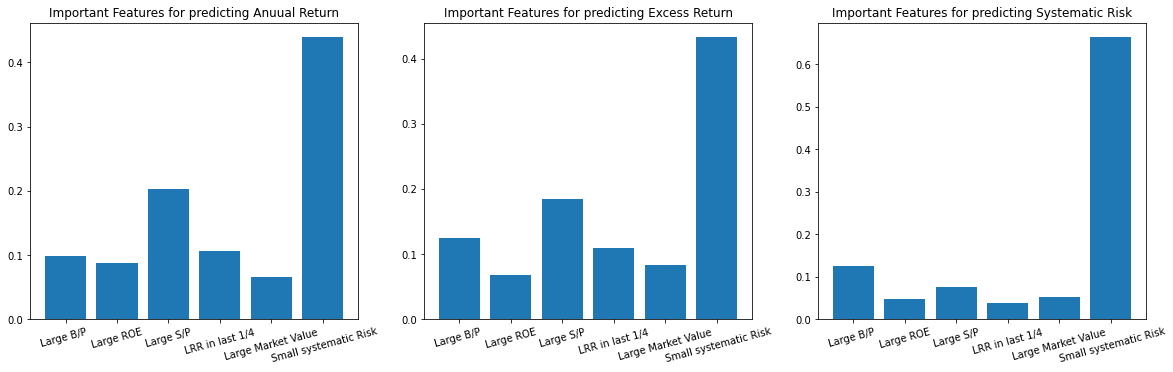

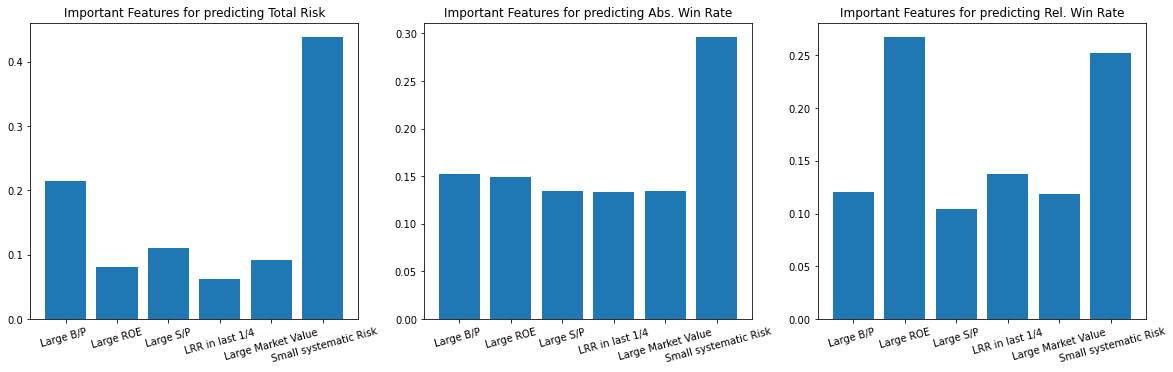

In [139]:
from matplotlib import pyplot

bars=('Large B/P ', ' Large ROE ', ' Large S/P ',
       ' LRR in last 1/4 ', ' Large Market Value ',
       ' Small systematic Risk')
x_pos = np.arange(len(bars))
# plot feature importance
plt.figure(1,figsize=(20, 12))
plt.subplot(2,3, 1)
plt.title("Important Features for predicting Anuual Return")
plt.xticks(x_pos,bars,rotation=15)
pyplot.bar([x for x in range(len(rt.feature_importances_))], rt.feature_importances_)
plt.subplot(2, 3, 2)
plt.title("Important Features for predicting Excess Return")
plt.xticks(x_pos,bars,rotation=15)
pyplot.bar([x for x in range(len(rt1.feature_importances_))], rt1.feature_importances_)
plt.subplot(2, 3, 3)
plt.title("Important Features for predicting Systematic Risk")
plt.xticks(x_pos,bars,rotation=15)
pyplot.bar([x for x in range(len(rt2.feature_importances_))], rt2.feature_importances_)
plt.figure(2,figsize=(20, 12))
plt.subplot(2,3, 1)
plt.title("Important Features for predicting Total Risk")
plt.xticks(x_pos,bars,rotation=15)
pyplot.bar([x for x in range(len(rt3.feature_importances_))], rt3.feature_importances_)
plt.subplot(2, 3, 2)
plt.title("Important Features for predicting Abs. Win Rate")
plt.xticks(x_pos,bars,rotation=15)
pyplot.bar([x for x in range(len(rt4.feature_importances_))], rt4.feature_importances_)
plt.subplot(2, 3, 3)
plt.title("Important Features for predicting Rel. Win Rate")
plt.xticks(x_pos,bars,rotation=15)
pyplot.bar([x for x in range(len(rt5.feature_importances_))], rt5.feature_importances_)
plt.show()

# Conclusion:
Systematic is the most important predictor for every portfolio performance parameter (risk, return and win rate)

LOE is an important feature to predict Rel. Win Rate

For a porfolio manager aiming for higher annual returns, it is best to invest in companies
with smaller market-caps. These investments will be riskier but the data shows that portfolios
that favor such companies tend to perform well.

However , We should mention that in order to make solid prediction , we should use the polynomial regression model